# Predicción de sitios de unión
A partir de la literatura se predijo la <u>disposición de los residuos de los bolsillos de unión</u> a los péptidos en las moléculas MHC, siendo estos críticos para la presentación antigénica. 

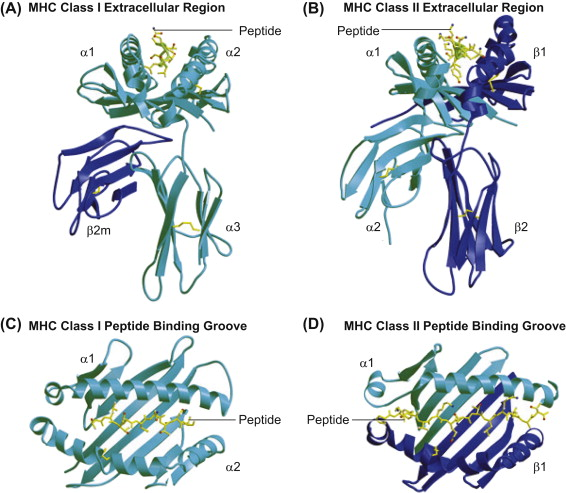

In [28]:
# Interacción de los MHC clase I y II con los péptidos (Thompson, 2014)
## Chapter 6 - The Major Histocompatibility Complex (MAK: Primer to the Immune Response) 
## DOI: https://doi.org/10.1016/B978-0-12-385245-8.00006-6 

from IPython import display
display.Image('Overall-view-of-MHC-I-and-class-II-molecules-and-their-peptide-binding.jpg')

Además, se usó el servidor ‘**Computed Atlas of Surface Topography of proteins**’ - CASTp v3.0 (http://sts.bioe.uic.edu/castp/index.html) (*Tian et al., 2018*) para predecir los residuos exactos que constituyen las cavidades y bolsillos de unión a los péptidos específicos, por medio de resultados teóricos y algorítmicos de geometría computacional.

In [1]:
# Instalar el paquete 'selenium'
!pip install selenium

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Importar los módulos necesarios de 'selenium'
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import Select
import time

In [3]:
# Establecer la ubicación del WebDriver
s = Service('/usr/local/bin/chromedriver')

In [34]:
# Inicializar el Selenium WebDriver
driver = webdriver.Chrome(service = s)

# Visitar al servidor CASTp v3.0
driver.get('http://sts.bioe.uic.edu/castp/calculation.html')

# Definir los nombres de los archivos input donde están las estructuras 3D de las proteínas
files = ['HLA-A*01:01_(6MPP)', 'HLA-A*02:01_(4U6X)', 'HLA-A*03:01_(3RL1)', 'HLA-A*24:02_(7JYV)', 'HLA-A*31:01',
        'HLA-B*35:01_(4PRN)', 'HLA-B*44:03_(3DX7)', 'HLA-B*51:01_(1E28)', 'HLA-C*03:04', 'HLA-C*04:01',
        'HLA-C*07:01', 'HLA-C*07:02_(5VGE)', 'HLA-DRB1*03:01', 'HLA-DRB1*04:07', 'HLA-DRB1*07:01_(7Z0Q)',
        'HLA-DRB1*08:02', 'HLA-DRB1*14:02_(6ATF)']

# Editar los parámetros
## Cargar el archivo input
select_file = driver.find_elements(by = By.ID, value = 'pdbfile')

## Definir el archivo de salida donde estarán los links de los resultados
resultados_CASTp = '/home/victor/Escritorio/Tesis/RESULTADOS/10. Predicción de sitios de unión/CASTp_links'

# Realizar la predicción de cavidades y bolsillos de unión en los HLA
for HLA in files:
    for value in select_file:
        value.send_keys(f'/home/victor/Escritorio/Tesis/RESULTADOS/10. Predicción de sitios de unión/PDB_Final/{HLA}.pdb')
        # Entregar la data
        driver.find_element(by = By.ID, value = 'btn_submit').click()
        time.sleep(3)
        ## Obtener los resultados de la predicción
        result_output = driver.find_element(By.ID, value = 'success_modal').text
        with open(resultados_CASTp, 'a') as file:
            print(f'{HLA} - {result_output}', file = file)
            print('\n ...........', file = file)
        driver.get('http://sts.bioe.uic.edu/castp/calculation.html')
        time.sleep(2)
        select_file = driver.find_elements(by = By.ID, value = 'pdbfile')
        resultados_CASTp = '/home/victor/Escritorio/Tesis/RESULTADOS/10. Predicción de sitios de unión/CASTp_links'

    
# Visualizar el output obtenido
with open(resultados_CASTp) as f:
    sitios_de_union = f.read()
    print(sitios_de_union)
    
driver.close()

HLA-A*01:01_(6MPP) - Your job j_64a0ac8d25d6b was submitted successfully.

You could check it using the following link when it is done.
http://sts.bioe.uic.edu/castp/index.html?j_64a0ac8d25d6b
(Please allow the server some time, since it might be costly to calculating all pockets for large proteins.)

 ...........
HLA-A*02:01_(4U6X) - Your job j_64a0ac9341656 was submitted successfully.

You could check it using the following link when it is done.
http://sts.bioe.uic.edu/castp/index.html?j_64a0ac9341656
(Please allow the server some time, since it might be costly to calculating all pockets for large proteins.)

 ...........
HLA-A*03:01_(3RL1) - Your job j_64a0ac981dbff was submitted successfully.

You could check it using the following link when it is done.
http://sts.bioe.uic.edu/castp/index.html?j_64a0ac981dbff
(Please allow the server some time, since it might be costly to calculating all pockets for large proteins.)

 ...........
HLA-A*24:02_(7JYV) - Your job j_64a0ac9e43793 was su